# Assignment 2
### Understanding Uncertainty
### Due 9/14
### Shiraz Robinson II

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iowa_df = pd.read_csv('./data/iowa.csv')

iowa_df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


**I would define the most profitable item with the formula:** 

* `Highest Total Profit = (State Bottle Retail - State Bottle Cost) * Bottles Sold`

**Reasoning:** Companies care about highest total profit contribution. Sales volume matters, low-margin items can be profitable if they are sold in large quantities. 

In [204]:
iowa_df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Zip Code',
       'Category Name', 'Vendor Name', 'Item Number', 'Item Description',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')

In [205]:
iowa_df['Item Description'].value_counts()

Item Description
BLACK VELVET                                                    3994
HAWKEYE VODKA                                                   3460
TITOS HANDMADE VODKA                                            2648
FIREBALL CINNAMON WHISKEY                                       2500
FIVE O'CLOCK VODKA                                              2013
                                                                ... 
BURNETTS BLUE RASPBERRY VODKA                                      1
MCCARTHYS 6 YEAR OREGON SINGLE MALT WHISKEY FINISHED IN PX S       1
XICARU SILVER MEZCAL                                               1
EFFEN VODKA TRIO PACK                                              1
RESILIENT BOURBON BOTTLED IN BOND                                  1
Name: count, Length: 5401, dtype: int64

<Axes: xlabel='Bottles Sold', ylabel='Item Description'>

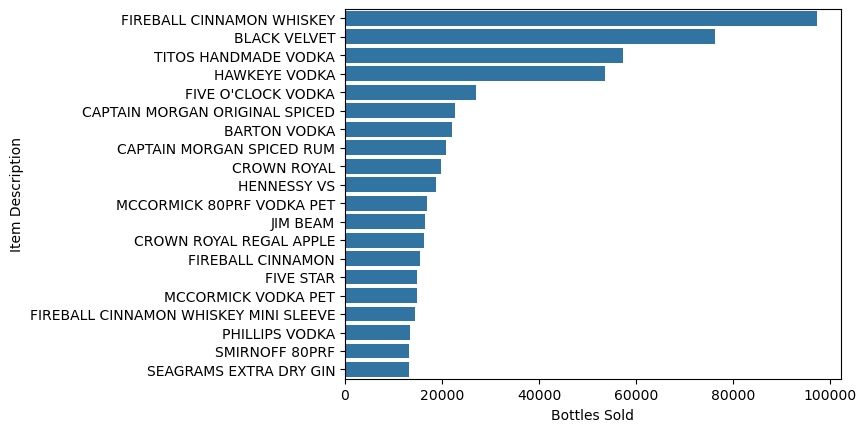

In [206]:

bottles = (iowa_df.loc[:,['Bottles Sold','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Bottles Sold',ascending=False) )

top_bottles = bottles[:20]
sns.barplot(top_bottles['Bottles Sold'], orient = 'h')

<Axes: xlabel='Highest Total Profit', ylabel='Item Description'>

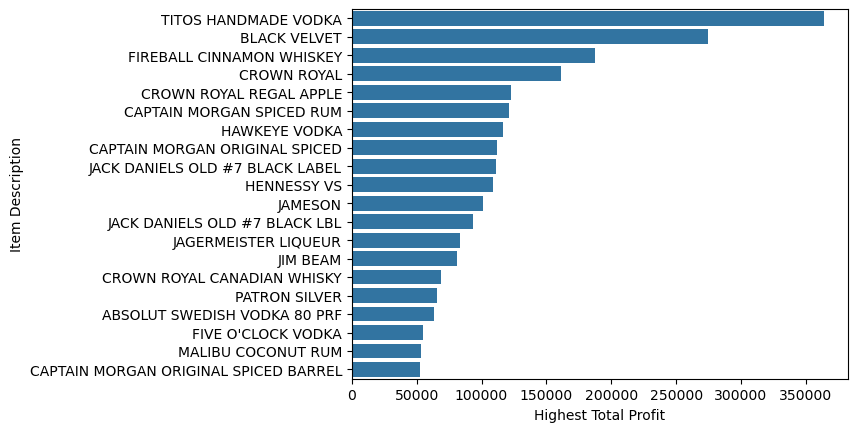

In [207]:
iowa_df['Highest Total Profit'] = (iowa_df['State Bottle Retail'] - iowa_df['State Bottle Cost']) * iowa_df['Bottles Sold']

profit = (iowa_df.loc[:,['Highest Total Profit','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Highest Total Profit',ascending=False) )

top_profits = profit[:20]
sns.barplot(top_profits['Highest Total Profit'], orient = 'h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [208]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [209]:
x

array([1, 3, 5])

In [210]:
y

array([2, 5])

In [211]:
x - y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

**Answer**: The dimensions are not same, you cannot subtract these vectors!

In [ ]:
x.reshape(-1,1)

array([[1],
       [3],
       [5]])

In [ ]:
y.reshape(1,-1)

array([[2, 5]])

In [ ]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

**Note:** A 3 x 2 matrix.

In [ ]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

**Note:** A 2 x 3 matrix.

**Comparsion between the 2 computations**: The transpose of `x.reshape(-1,1)-y.reshape(1,-1)` [3 x 2 matrix] is `x.reshape(1,-1)-y.reshape(-1,1)` [2 x 3 matrix].

In [ ]:
print(x.shape)
print(y.shape)

(3,)
(2,)


In [ ]:
result_loop = np.zeros((x.shape[0],y.shape[0]))

for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        result_loop[i,j] = x[i] - y[j]

print("\nDouble for-loop replication result for x.reshape(-1,1)-y.reshape(1,-1):")
print(result_loop)


Double for-loop replication result for x.reshape(-1,1)-y.reshape(1,-1):
[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


In [ ]:
result_loop = np.zeros((y.shape[0],x.shape[0]))

for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        result_loop[j,i] = x[i] - y[j]

print("\nDouble for-loop replication result for x.reshape(1,-1)-y.reshape(-1,1):")
print(result_loop)






Double for-loop replication result for x.reshape(1,-1)-y.reshape(-1,1):
[[-1.  1.  3.]
 [-4. -2.  0.]]


In [ ]:
x.reshape(1,-1)

array([[1, 3, 5]])

In [ ]:
x.reshape(-1,1)

array([[1],
       [3],
       [5]])

**Answer:** `x.reshape(1,-1)` turns $x$ into a row. `x.reshape(-1,1)` turns $x$ into a column. 

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

[Text(0.5, 1.0, 'Indicator Function at x = 3')]

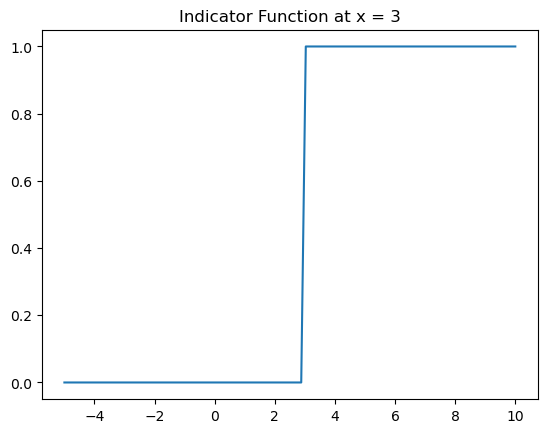

In [ ]:
grid = np.linspace(-5, 10, 100)

def ind_ls(x, grid):
    return (x <= grid).astype(int)

sns.lineplot(x=grid, y=ind_ls(3, grid)).set(title='Indicator Function at x = 3')



## Proof: $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$

### Step 1: Define the indicator function

$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

### Step 2: Multiply the indicator function by -1


$$
-\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
-1, &x \le z
\end{cases}
$$

### Step 3: Add 1 to the indicator function


$$
1-\mathbb{I}\{x \le z\} = \begin{cases}
1 + 0, &x > z \\
1 - 1, &x \le z
\end{cases}
$$

### Step 4: Simplify

$$
1-\mathbb{I}\{x \le z\} = \begin{cases}
1 , &x > z \\
0, &x \le z
\end{cases}
$$

### Step 5: Complete the proof

$$
1-\mathbb{I}\{x \le z\} = \mathbb{I}\{ x > z \}
$$

**Reasoning:** The mathematical statement in step 5 follows the same logic of as $pr(A)$ and $1-pr(A)$. The proabaility that A occurs, can be denoted as $pr(A)$. The complement of A is $1-pr(A)$.

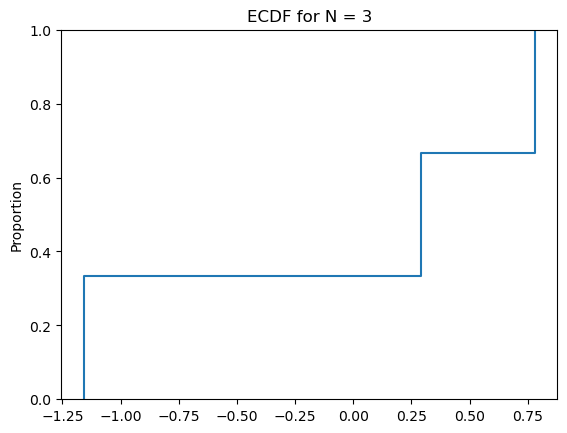

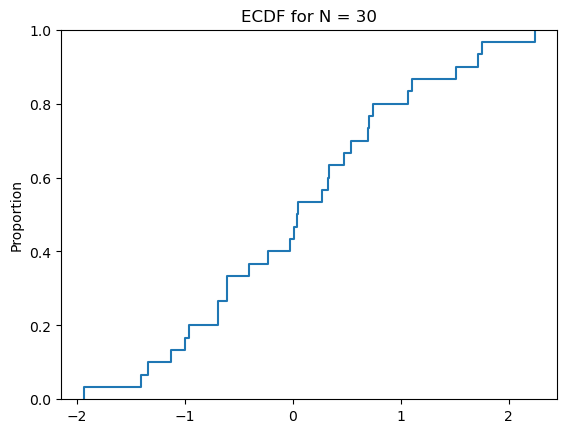

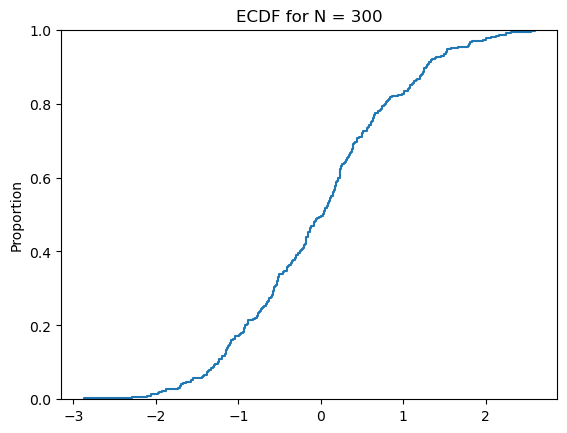

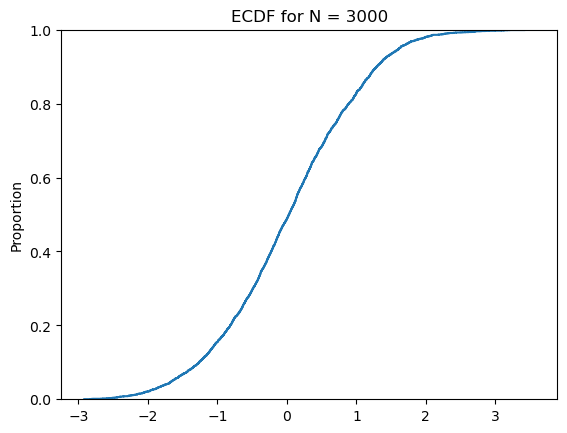

In [ ]:
rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here: 
    sns.ecdfplot(x=X)
    plt.title(f'ECDF for N = {N}')
    plt.show()

**Answer:** As N increases, each ECDF gets closer to estimating the true CDF. 

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [ ]:
import numpy as np

def Quantile(x, q):
    """
    Compute the q-quantile (0 <= q <= 1) of 1D data using the 'linear' method:
    i = (n - 1) * q; interpolate between floor(i) and ceil(i).
    """
    # Coerce to 1D numpy array
    x = np.asarray(x, dtype=float).ravel()
    if x.size == 0:
        return np.nan

    # Sort
    xs = np.sort(x)
    n = xs.size

    # Index math (linear interpolation method)
    i = (n - 1) * q
    lo = int(np.floor(i))
    hi = int(np.ceil(i))
    w = i - lo  # fractional part

    return (1 - w) * xs[lo] + w * xs[hi]


In [ ]:
def IQR_Whiskers(x):
    Q1 = Quantile(x, 0.25)
    Q3 = Quantile(x, 0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    
    return IQR, Lower_Whisker, Upper_Whisker
        
    
    


In [ ]:
def Five_Num_Summary(x):
    
    return np.min(x), Quantile(x, 0.25), Quantile(x, 0.5), Quantile(x, 0.75), np.max(x), IQR_Whiskers(x)['Lower_Whisker'], IQR_Whiskers(x)['Upper_Whisker']
    
    

In [ ]:
def Outlier(x):
     IQR, Lower_Whisker, Upper_Whisker = IQR_Whiskers(x)
     return (x < Lower_Whisker) | (x > Upper_Whisker) 


In [ ]:

metabric = pd.read_csv('./data/metabric.csv')

In [ ]:
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [ ]:
t = metabric['Age at Diagnosis']

In [ ]:
Outlier(t)

0       False
1       False
2       False
3       False
4       False
        ...  
1338    False
1339    False
1340    False
1341    False
1342    False
Name: Age at Diagnosis, Length: 1343, dtype: bool

In [ ]:
Outlier(t).value_counts()

Age at Diagnosis
False    1342
True        1
Name: count, dtype: int64

In [ ]:
Five_Num_Summary(t)

{'Minimum': 21.93,
 'Q1': np.float64(51.045),
 'Median': np.float64(61.14),
 'Q3': np.float64(69.815),
 'Maximum': 96.29,
 'Lower Whisker': np.float64(22.890000000000008),
 'Upper Whisker': np.float64(97.97)}

<Axes: ylabel='Age at Diagnosis'>

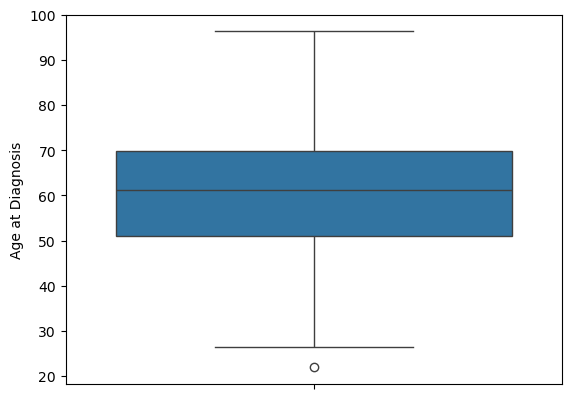

In [ ]:
sns.boxplot(t)

In [ ]:
t.describe()

count    1343.000000
mean       60.598079
std        12.966330
min        21.930000
25%        51.045000
50%        61.140000
75%        69.815000
max        96.290000
Name: Age at Diagnosis, dtype: float64